In [1]:
# 필요한 패키지 불러오지
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_1 = pd.read_csv('book.csv', encoding='euc-kr')

# df_1.head()

In [3]:
df_1.tail()

,Unnamed: 0,ID,Title,Rating,Author,Price,Pdate,Publisher,Btype,Salseindex
3305,3305,97046591,죽음이 삶에게 보내는 편지,NaN,에크낫 이스워런,"7,200",2005년 06월 23일,예문,old,NaN
3306,3306,97046592,NaN,NaN,NaN,NaN,NaN,NaN,new,NaN
3307,3307,97046593,NaN,NaN,NaN,NaN,NaN,NaN,new,NaN
3308,3308,97046594,부모-자녀 함께 가는 멋진 세상,NaN,삼성사회정신건강연구소,"7,000",2009년 01월 10일,교육과학사,old,NaN
3309,3309,97046595,NaN,NaN,NaN,NaN,NaN,NaN,new,NaN


In [4]:
df_1 = df_1.dropna(subset=['Title'])
df_1 = df_1[df_1['Title'].str.strip() != '']

df_2 = df_1.dropna(subset=['Publisher'])
df_2 = df_2[df_2['Publisher'].str.strip() != '']


In [5]:
# 한국어 타이틀 레코드만 가져옴
df = df_2[df_1['Title'].str.contains('[가-힣]', regex=True)]
# 한국어 [가-힣]
# 영어[A-Za-z]
# 일본어 [ぁ-んァ-ン]


In [6]:
# price  object => 수치형
df['Price'] = pd.to_numeric(df['Price'].str.replace('[^\d.]', ''), errors='coerce')

# 'Pdate' 컬럼을 날짜 타입으로 변환 (한국어 날짜 형식에 맞춤)
df['Pdate'] = pd.to_datetime(df['Pdate'], format='%Y년 %m월 %d일', errors='coerce')


/tmp/ipykernel_131144/2896205693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = pd.to_numeric(df['Price'].str.replace('[^\d.]', ''), errors='coerce')
/tmp/ipykernel_131144/2896205693.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pdate'] = pd.to_datetime(df['Pdate'], format='%Y년 %m월 %d일', errors='coerce')


In [7]:
# 클러스터링을 위한 패키지
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


In [8]:
# 벡터화
df['t_p'] = df['Publisher'] + "_" + df['Title']

tfidf_vectorizer = TfidfVectorizer(max_features=100) # 전체 단어 집합에서 TF-IDF 값이 가장 높은 상위 n개의 단어만을 선택하여 특성 벡터를 생성
X_tfidf = tfidf_vectorizer.fit_transform(df['t_p'])

/tmp/ipykernel_131144/3641468735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t_p'] = df['Publisher'] + "_" + df['Title']


In [9]:
# 클러스터링 수행
kmeans = KMeans(n_clusters=20, random_state=42)
kmeans.fit(X_tfidf)

KMeans(n_clusters=20, random_state=42)

In [10]:
# 결과 할당
df['Cluster']=kmeans.labels_

/tmp/ipykernel_131144/3736937293.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster']=kmeans.labels_


In [11]:
# 클러스터 별로 데이터 확인
for cluster in range(20): # 클러스터의 수에 따라 범위 조정
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster]['Title'], '\n') # 각 클러스터에 속한 책 제목 예시 출력

Cluster 0:
5                        해저 2만리
6                     자기관리 손자병법
12            우리 민족 문화 상징 100 2
18                  엄마 없어서 슬펐니?
19                  만화 박은식 한국통사
                 ...           
3271                         청사
3277    PASS119 제이디윤 스마트 생활영어 1
3288             내 안에 행복을 담는 지혜
3305             죽음이 삶에게 보내는 편지
3308          부모-자녀 함께 가는 멋진 세상
Name: Title, Length: 1823, dtype: object 

Cluster 1:
253                        한국 인물 이야기
272     초등학생이 꼭 알아야 할 100가지 지혜로운 이야기
308                  문화재로 배우는 근대 이야기
337              외교관 아빠가 들려주는 외교 이야기
966               놀라운 우리 겨레 선비학자 이야기
995                 세상 모든 법률가의 법 이야기
996                세상 모든 발명가의 발명 이야기
997                세상 모든 수학자의 수학 이야기
1048                    농부가 된 의사 이야기
1051            세상 모든 철학자의 동양 철학 이야기
1109             말랑하고 쫀득~한 세계 지리 이야기
1111               플라톤이 들려주는 이데아 이야기
1138                        인류 이야기 2
1152             교과서보다 엄청 똑똑한 과학 이야기
1153                       조선사 이야기 1
1158                        

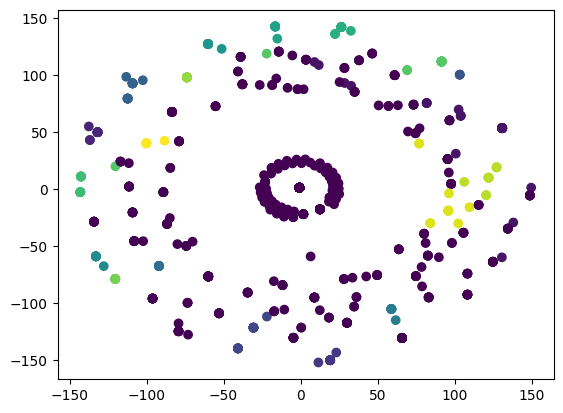

In [12]:
# 클러스터 결과 시각화
# T-SNE  차원 축소 방법 사용
# 고차원의 TF-IDF 벡터를 2차원으로 매핑한 후 클러스터링 결과를 시각화
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_tfidf.toarray())
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_)
plt.show()

Word2Vec 모델

In [13]:
df['t_p'] = df['Title']
# df['t_p'] = df['Publisher'] + "_" + df['Title']

/tmp/ipykernel_131144/2558638996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t_p'] = df['Title']


In [14]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

# 텍스트 전처리

# 문서를 단어 리스트로 변환
documents = [text.split() for text in df['t_p']]


In [15]:
documents[0]

['해저', '2만리']

In [16]:
# Word2Vec: 단어의 벡터 변환 모델 중 하나, 비슷한 의미를 가진 단어들이 벡터 공간에서 서로 가까이 위치하도록 학습
model = Word2Vec(sentences=documents, vector_size=100, window=5, min_count=1, workers=4)

# sentences=documents: 학습에 사용될 데이터(문서) 리스트 포맷(각 문서 내 단어들을 리스트)
# vector_size=100: 생성될 단어 벡터 차원 수
# window=5: 단어 예측을 위해 고려하는 주변 단어의 범위. 5:타겟 단어의 앞뒤로 5개의 단어를 컨텍스트로 사용
# min_count=1: 학습에 포함될 최소 단어 빈도수
# workers=4: 스레드의 수(병렬 처리)


#  문서 벡터 생성(<- 단어 벡터 평균)
def document_vector(word2vec_model, doc):
    vector_size = word2vec_model.vector_size   # 단어 벡터 차원 수

    doc_vector = np.zeros(vector_size) # 문서 벡터(초기값 0) 문서 내 각 단어의 벡터를 더함
    num_words = 0
    for word in doc:
        try:
            doc_vector += word2vec_model.wv[word]
            num_words += 1
        except KeyError: # 문서 내 단어의 수
            continue
    if num_words == 0:
        return np.zeros(vector_size)
    else:
        return doc_vector / num_words  # 각 단어 벡터를 더해서 구해진 doc_vector를 num_words로 나누어 평균 계산 (단어 벡터 평균)
                                       # 클러스터링의 input 으로 사용

# 각 문서 벡터 생성
doc_vectors = np.array([document_vector(model, doc) for doc in documents])


In [26]:
vector = model.wv["소리"]
vector

array([-3.0103745e-03,  3.7423286e-03,  3.9138058e-03,  2.3885116e-03,
        7.5746756e-03,  3.3994997e-03,  5.8303410e-03,  5.7843891e-03,
       -9.1885943e-03,  8.8071562e-03, -1.6164995e-03, -5.3728675e-03,
       -8.2969936e-03,  3.0449661e-03, -3.9242450e-03,  9.8406533e-03,
        9.9560823e-03,  6.3850502e-03,  8.0328883e-04,  7.2824949e-04,
       -9.8365378e-03,  9.6299993e-03,  6.9501000e-03, -8.9877443e-03,
       -6.4926897e-03,  5.4812464e-03, -1.6124475e-04, -5.3750733e-03,
        3.3217338e-03, -9.4243605e-03,  6.5750000e-03,  2.6268456e-03,
        3.1197842e-03,  7.9025719e-03,  2.8153923e-03, -6.9032232e-03,
        1.7165134e-03, -2.6161384e-03, -5.5939048e-03,  5.3526196e-03,
        1.4183408e-04, -4.8742309e-04, -4.4399942e-03,  1.7747886e-03,
       -2.5658910e-03,  3.5501081e-03,  8.9318150e-05, -1.1792879e-03,
       -1.0479988e-03,  9.3376357e-03,  8.4621031e-03,  3.1811818e-03,
        5.1492597e-03, -1.7146934e-03, -3.7408080e-03,  9.0594832e-03,
      

In [27]:
# K-평균 클러스터링 모델 생성 및 학습
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(doc_vectors)

# 클러스터 할당 결과
df['Cluster'] = kmeans.labels_


/tmp/ipykernel_131144/848276615.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


In [28]:
# 클러스터 별로 데이터 확인
for cluster in range(5): # 클러스터의 수에 따라 범위 조정
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster]['Title'].head(), '\n') # 각 클러스터에 속한 책 제목 예시 출력

Cluster 0:
6         자기관리 손자병법
18      엄마 없어서 슬펐니?
30    톡톡샘의 포토샵 성형외과
33          육식의 성정치
37         바이바이 베스파
Name: Title, dtype: object 

Cluster 1:
5                해저 2만리
12    우리 민족 문화 상징 100 2
19          만화 박은식 한국통사
23         마음의 소리 vol.2
24          한국사의 새로운 이해
Name: Title, dtype: object 

Cluster 2:
252             노인과 바다
527                팬데믹
699    21세기 먼나라 이웃나라 3
701    21세기 먼나라 이웃나라 5
702    21세기 먼나라 이웃나라 2
Name: Title, dtype: object 

Cluster 3:
39    MAN TO MAN 기본영어 1
52             러셀 서양철학사
54              삼국지 (상)
58              삼국지 (하)
61    T-Commerce 전략과 기술
Name: Title, dtype: object 

Cluster 4:
20     한국문학인 2015년 겨울호 통권33호
26               타이거수사대-13권 
45               지방화시대의 관광개발
81                아라비안 나이트 3
247            자바스크립트 완벽 가이드
Name: Title, dtype: object 



In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 텍스트 토큰화 및 시퀀스 변환
tokenizer = Tokenizer()
# Tokenizer 객체를 사용하여 텍스트를 토큰화, 각 토큰(단어)에 고유한 정수 인덱스 할당
tokenizer.fit_on_texts(df['Title'])
X_seq = tokenizer.texts_to_sequences(df['Title'])

2024-10-25 15:26:12.001231: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-25 15:26:12.016582: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-25 15:26:12.021307: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-25 15:26:12.032695: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-25 15:26:12.740695: W tensorflow/compiler/tf2

In [30]:
################# FastText  #################
from gensim.models import FastText

# 예제 문장들
sentences = [['cat', 'say', 'meow'], ['dog', 'say', 'woof']]

# FastText 모델 훈련
model = FastText(sentences, vector_size=100, window=5, min_count=1, workers=4)

# 'cat' 단어의 벡터 조회
print(model.wv['cat'])

[-3.08066304e-03 -7.90226390e-04 -2.73370859e-03  1.61904667e-03
 -1.66713522e-04  6.28919399e-04  9.15853481e-04  3.49709508e-03
  1.62937783e-03  4.91646770e-03  2.77808547e-04 -1.39591098e-03
 -3.55925737e-03  1.01852708e-03  5.35819272e-04  1.28516625e-03
  4.77675669e-04  1.46795274e-03 -4.46858292e-04 -1.06995976e-04
 -2.04688148e-03  2.61852262e-03 -7.45429657e-04  2.08033761e-03
 -1.13760144e-03 -3.43189389e-03 -3.78587609e-03 -7.24313839e-04
 -1.30828656e-03  1.19137007e-03  7.66331214e-04  4.83161490e-03
  9.78983124e-04  3.17783700e-03  2.34751962e-03 -2.66464660e-03
 -1.32662349e-03 -4.01243247e-04  3.82719038e-04 -2.54542427e-03
 -2.49923527e-04 -4.83285869e-03 -4.70269052e-03  2.44425796e-03
 -4.80298093e-03 -3.20287934e-03  2.02403011e-04  2.88115279e-03
 -2.96206702e-03 -1.78865588e-03 -4.56541049e-04 -2.65269354e-03
  3.16352444e-03 -9.34481970e-04 -3.65442189e-04  1.79229118e-03
 -1.84320379e-03  1.56961230e-03  2.01237039e-03 -4.33722837e-03
  1.29108585e-03  4.41135

In [31]:
################# FastText  #################
from gensim.models import FastText
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# FastText 모델 학습 (로컬 데이터에서)
# sentences = [title.split() for title in df['Title']]
sentences = [title.split() for title in df['Title']]
fasttext_model = FastText(X_seq, vector_size=64, window=5, min_count=1)

# 책 제목 -> 벡터화
def vectorize_w_fasttext(text):
    words = text.split()
    word_vectors = [fasttext_model.wv[word] for word in words if word in fasttext_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(fasttext_model.vector_size)
    return np.mean(word_vectors, axis=0)

# 제목 벡터화
title_vectors = np.array([vectorize_w_fasttext(title) for title in df['Title']])



In [32]:
# 유사한 단어
model.wv.most_similar('영어')

[('say', 0.20480839908123016),
 ('dog', -0.023522047325968742),
 ('cat', -0.1022270917892456),
 ('meow', -0.15924866497516632),
 ('woof', -0.2406514286994934)]

In [33]:
# 두 단어간 유사도 확인
model.wv.similarity('수학', '영어')

0.26143593

In [34]:
# K-평균 클러스터링 모델 생성 및 학습
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(title_vectors)

# 클러스터 할당 결과
df['Cluster'] = kmeans.labels_

/tmp/ipykernel_131144/4201114249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = kmeans.labels_


In [35]:
# 클러스터 별로 데이터 확인
for cluster in range(10): # 클러스터의 수에 따라 범위 조정
    print(f"Cluster {cluster}:")
    print(df[df['Cluster'] == cluster]['Title'].head(), '\n') # 각 클러스터에 속한 책 제목 예시 출력


Cluster 0:
5                    해저 2만리
18              엄마 없어서 슬펐니?
20    한국문학인 2015년 겨울호 통권33호
23             마음의 소리 vol.2
26              타이거수사대-13권 
Name: Title, dtype: object 

Cluster 1:
19    만화 박은식 한국통사
37       바이바이 베스파
43     네 멋대로 행복하라
52       러셀 서양철학사
59    통기초 영어 생활회화
Name: Title, dtype: object 

Cluster 2:
282          리더
1545    360도 리더
Name: Title, dtype: object 

Cluster 3:
39     MAN TO MAN 기본영어 1
88              평가원 코드 1
95              인간의 굴레 1
221      우리 아이 첫 경주 여행 1
269             노마의 발견 1
Name: Title, dtype: object 

Cluster 4:
12     우리 민족 문화 상징 100 2
90              평가원 코드 2
180         떴다! 지식 탐험대 2
201        이탈리아에서 보물찾기 2
291             중학생 소설 2
Name: Title, dtype: object 

Cluster 5:
81          아라비안 나이트 3
597          스카이 SKY 3
699    21세기 먼나라 이웃나라 3
740             당재자전 3
747             세설신어 3
Name: Title, dtype: object 

Cluster 6:
714         신감
1226    투 스테이츠
1990    투 스테이츠
Name: Title, dtype: object 

Cluster 7:
6                         자기관리 손자병법
2